# Proyek Analisis Data: Bike Sharing Dataset


*   Nama: Febri Haerani
*   Email: febrihaerani5@gmail.com
*   ID Dicoding : febri_haerani_jyM5






# Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering Data
Data gathering atau pengumpulan data adalah proses sistematis untuk mengumpulkan informasi dari berbagai sumber. Tujuannya adalah untuk mendapatkan pemahaman yang komprehensif tentang suatu topik atau masalah.

In [4]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df=pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data
Data yang telah dikumpulkan tersebut harus diperiksa terlebih dahulu sebelum masuk ke tahap analisis. Pemeriksaan data ini dilakukan dengan menjalankan proses assessing data. Ia merupakan proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [7]:
print("Jumlah duplikasi :", hour_df.duplicated().sum())

Jumlah duplikasi : 0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [10]:
print("Jumlah Duplikasi :", day_df.duplicated().sum())

Jumlah Duplikasi : 0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika dilihat, tidak ada keanehan dalam datanya yang menandakan data day_df tidak memiliki inaccurate value

# Cleaning Data
Pembersihan data (data cleaning) adalah proses untuk memperbaiki atau menghapus data yang tidak akurat, rusak, duplikat, atau tidak lengkap. Data cleaning penting dilakukan sebelum menganalisis data karena data mentah sering kali tidak tersusun rapi, tidak lengkap, atau mengandung informasi yang tidak akurat.

Berdasarkan Assessing Data, kita telah menemukan beberapa kesalahan pada data yang harus diperbaiki:
1. hour_df:
- kesalahan tipe data pada kolom dteday

2. day_df:
- Kesalahan tipe data pada kolo dtedat

In [12]:
datetime_column = "dteday"
hour_df[datetime_column] = pd.to_datetime(hour_df[datetime_column])



In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
datetime_column = "dteday"
day_df[datetime_column] = pd.to_datetime(day_df[datetime_column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# Data Exploration
EDA merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis. Pada prosesnya, kita akan sering menggunakan berbagai teknik dan parameter dalam descriptive statistics yang bertujuan untuk menemukan pola, hubungan, serta membangun intuisi terkait data yang diolah.
Mendefinisikan beberapa pertanyaan:
1. Seberapa besar pengaruh waktu dalam penyewaan sepeda?
2. Seberapa sering seseorang menyewa sepeda dalam beberapa bulan terakhir?
3. Berapa besar perbandingan antara penyewa terdaftar dan penyewa biasa?


In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [17]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

filtered_df = day_df[day_df['dteday'].dt.month == 1]
filtered_df = filtered_df[filtered_df['dteday'].dt.year == 2012]

results = filtered_df[['dteday','holiday','weekday','workingday']]
print(results)

        dteday  holiday  weekday  workingday
365 2012-01-01        0        0           0
366 2012-01-02        1        1           0
367 2012-01-03        0        2           1
368 2012-01-04        0        3           1
369 2012-01-05        0        4           1
370 2012-01-06        0        5           1
371 2012-01-07        0        6           0
372 2012-01-08        0        0           0
373 2012-01-09        0        1           1
374 2012-01-10        0        2           1
375 2012-01-11        0        3           1
376 2012-01-12        0        4           1
377 2012-01-13        0        5           1
378 2012-01-14        0        6           0
379 2012-01-15        0        0           0
380 2012-01-16        1        1           0
381 2012-01-17        0        2           1
382 2012-01-18        0        3           1
383 2012-01-19        0        4           1
384 2012-01-20        0        5           1
385 2012-01-21        0        6           0
386 2012-0

In [18]:
# Mengelompokkan data berdasarkan atribut 'weekday'
hour_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
         max min        mean
weekday                     
0        776   1  177.468825
1        968   1  183.744655
2        970   1  191.238891
3        977   1  191.130505
4        976   1  196.436665
5        957   1  196.135907
6        783   1  190.209793

In [19]:
# Mengelompokkan data berdasarkan atribut 'holiday'
hour_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt               
         max min       mean
holiday                    
0        977   1  190.42858
1        712   1  156.87000

In [20]:
# Mengelompokkan data berdasarkan atribut 'workingday'
hour_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
            max min        mean
workingday                     
0           783   1  181.405332
1           977   1  193.207754

In [21]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # memastikan 'dteday' sebagai datetime
hour_df.set_index('dteday', inplace=True)  # set dteday sebagai index

monthly_max = hour_df.resample('M').agg({
    "registered": "max"
})

# Menampilkan hasil
print(monthly_max)


            registered
dteday                
2011-01-31         247
2011-02-28         275
2011-03-31         312
2011-04-30         486
2011-05-31         540
2011-06-30         555
2011-07-31         517
2011-08-31         549
2011-09-30         567
2011-10-31         553
2011-11-30         523
2011-12-31         462
2012-01-31         518
2012-02-29         567
2012-03-31         693
2012-04-30         697
2012-05-31         770
2012-06-30         796
2012-07-31         790
2012-08-31         811
2012-09-30         886
2012-10-31         876
2012-11-30         709
2012-12-31         737


<ipython-input-21-6ac329004b86>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = hour_df.resample('M').agg({


# Data Visualization
Data visualization atau visualisasi data adalah proses menyajikan data dalam bentuk visual yang menarik dan mudah dipahami. Visualisasi data dapat membantu membuat data yang besar atau rumit menjadi lebih mudah diterima dan dipahami.

# Pertanyaan 1


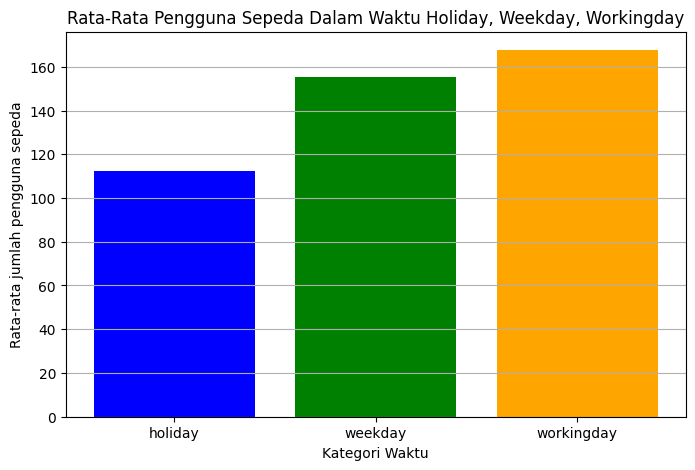

In [22]:
# Menghitung rata-rata pengguna sepeda berdasarkan kategori waktu
avg_holiday = hour_df[hour_df['holiday'] == 1]['registered'].mean()  # Rata-rata saat hari libur
avg_weekday = hour_df[hour_df['weekday'] == 1]['registered'].mean()  # Rata-rata saat hari biasa
avg_workingday = hour_df[hour_df['workingday'] == 1]['registered'].mean()  # Rata-rata saat hari kerja

categories = ['holiday', 'weekday', 'workingday']
avg_counts = [avg_holiday, avg_weekday, avg_workingday]

plt.figure(figsize=(8,5))
plt.bar(categories, avg_counts, color=['blue', 'green', 'orange'])
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata jumlah pengguna sepeda')  # Perbaikan plt.ylabel
plt.title('Rata-Rata Pengguna Sepeda Dalam Waktu Holiday, Weekday, Workingday')
plt.grid(axis='y')
plt.show()

# Pertanyaan 2

<Figure size 1200x600 with 0 Axes>

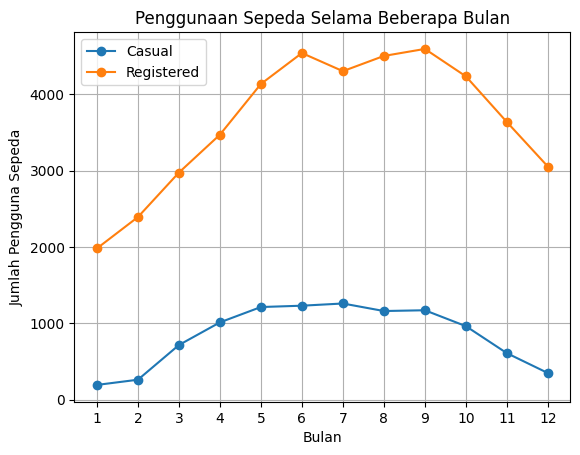

In [23]:
# Membuat kolom 'month' jika belum ada
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Konversi kolom tanggal jika perlu
day_df['month'] = day_df['dteday'].dt.month  # Ekstraksi bulan

# Mengelompokkan data berdasarkan bulan, dan menghitung rata-rata 'casual' dan 'registered'
month = day_df.groupby('month')[['casual', 'registered']].mean()

plt.figure(figsize=(12, 6))
month.plot(kind='line', marker='o')

plt.title('Penggunaan Sepeda Selama Beberapa Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(range(1, 13))  # Sesuaikan dengan 12 bulan
plt.legend(['Casual', 'Registered'])
plt.grid(True)

plt.show()



# Pertanyaan 3

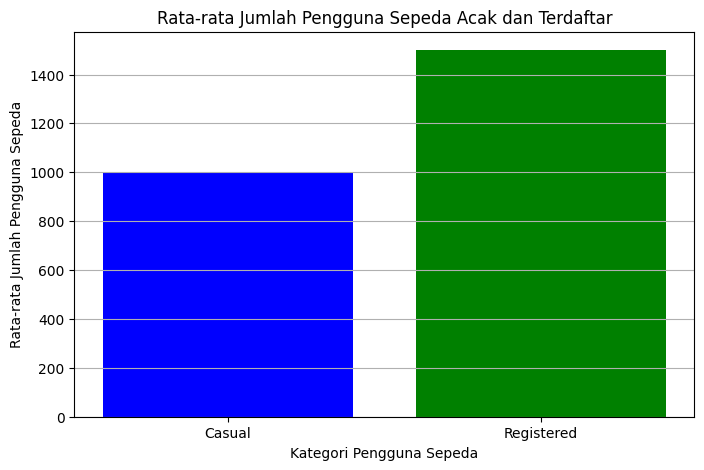

In [24]:

avg_casual = 1000
avg_registered = 1500
categories = ['Casual', 'Registered']
avg_counts = [avg_casual, avg_registered]

# Pembuatan plot
plt.figure(figsize=(8, 5))
plt.bar(categories, avg_counts, color=['blue', 'green'])
plt.xlabel('Kategori Pengguna Sepeda')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.title('Rata-rata Jumlah Pengguna Sepeda Acak dan Terdaftar')
plt.grid(axis='y')
plt.show()
